# Solar Power: 910 Braemar Road.

[Harrisons](https://www.harrisonsenergy.co.nz/?utm_source=AdWords&utm_medium=cpc&keyword=harrison&gclid=CjwKCAjwtO7qBRBQEiwAl5WC20HxTbYta0m2zwOt3aZV3295hPv4UwjK6XnD9MEPNESZUWu6OGJL_xoC_KgQAvD_BwE) are installing this system. 

## Existing usage
The usage at the start includes both a spa and non-spa. Also, in the equinox, the system relies on sun being occluded by a hill at 1330. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Timestamp
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [43]:
! jupyter labextension install @jupyter-widgets/jupyterlab-manager

\^C
Traceback (most recent call last):
  File "/Library/anaconda3/bin/jupyter-labextension", line 10, in <module>
    sys.exit(main())
  File "/Library/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Library/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Library/anaconda3/lib/python3.7/site-packages/jupyterlab/labextensions.py", line 308, in start
    super(LabExtensionApp, self).start()
  File "/Library/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 257, in start
    self.subapp.start()
  File "/Library/anaconda3/lib/python3.7/site-packages/jupyterlab/labextensions.py", line 93, in start
    ans = self.run_task()
  File "/Library/anaconda3/lib/python3.7/site-packages/jupyterlab/labextensions.py", line 149, in run_task
    for i, arg in enumerate(self.ext

### Genesis energy usage

In [2]:
consumption = pd.DataFrame({'DATE_READ': [Timestamp('2019-06-01'),
                                          Timestamp('2019-07-07'),
                                          Timestamp('2019-07-20'),
                                          Timestamp('2019-08-02'),
                                          Timestamp('2019-08-21'),
                                          Timestamp('2019-09-19'),
                                          Timestamp('2019-10-20'),
                                          Timestamp('2019-11-15'),
                                          Timestamp('2019-12-12'),
                                          Timestamp('2020-01-22')],
                           'READING':[123390,
                                      124499,
                                      124897,
                                      125367,
                                      125856,
                                      126732,
                                      127461,
                                      128016,
                                      128711,
                                      129606]})
consumption['DATE_READ'] = consumption['DATE_READ'].dt.date
consumption

,DATE_READ,READING
0,2019-06-01,123390
1,2019-07-07,124499
2,2019-07-20,124897
3,2019-08-02,125367
4,2019-08-21,125856
5,2019-09-19,126732
6,2019-10-20,127461
7,2019-11-15,128016
8,2019-12-12,128711
9,2020-01-22,129606


In [3]:
consumption['DAYS_SUPPLY'] = consumption.iloc[:,0].diff()
consumption['kWh'] = consumption.iloc[:,1].diff()
consumption['Days'] = consumption.iloc[1:,2].cumsum()
daily_charge = .3333
unit_charge = .3028
consumption.set_index('DATE_READ', inplace=True)
consumption['PRICE'] = ((daily_charge*consumption['DAYS_SUPPLY'].dt.days + \
                        unit_charge*consumption['kWh'])*1.15).round(2)

#Include GST of 15%

consumption

,READING,DAYS_SUPPLY,kWh,Days,PRICE
DATE_READ,,,,,
2019-06-01,123390,NaT,NaN,NaT,NaN
2019-07-07,124499,36 days,1109.0,36 days,399.97
2019-07-20,124897,13 days,398.0,49 days,143.57
2019-08-02,125367,13 days,470.0,62 days,168.65
2019-08-21,125856,19 days,489.0,81 days,177.56
2019-09-19,126732,29 days,876.0,110 days,316.16
2019-10-20,127461,31 days,729.0,141 days,265.73
2019-11-15,128016,26 days,555.0,167 days,203.23
2019-12-12,128711,27 days,695.0,194 days,252.36


In [4]:
spa = consumption['PRICE'][1:4].sum()/consumption['DAYS_SUPPLY'][1:4].dt.days.sum()*30
no_spa = consumption['PRICE'][4:].sum()/consumption['DAYS_SUPPLY'][4:].dt.days.sum()*30
total_consumption = consumption['PRICE'][:].sum()

print('The average monthly consumption with the spa is ${0:.2f}.'.format(spa))
print('The average monthly consumption with no spa is ${0:.2f}.'.format(no_spa))
print('The total consumption is ${0:.2f}'.format(total_consumption))

The average monthly consumption with the spa is $344.61.
The average monthly consumption with no spa is $267.47.
The total consumption is $2254.60


Text(0, 0.5, 'kWh')

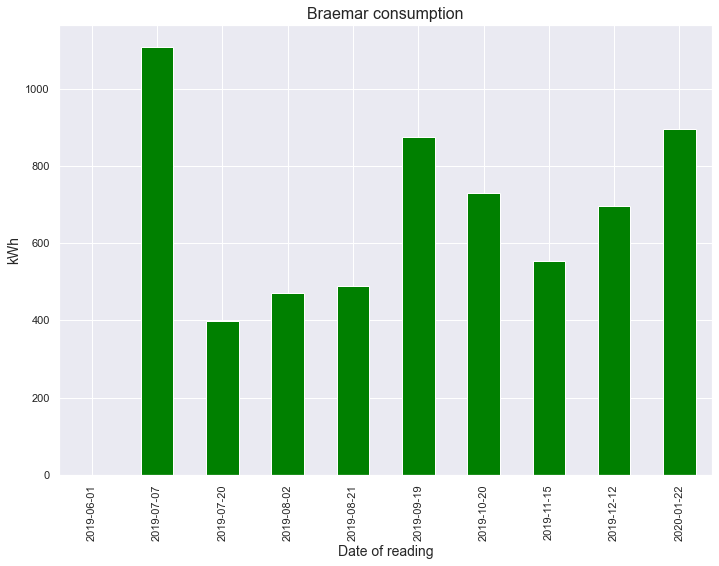

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax1 = consumption['kWh'].plot(color='green', kind='bar')
ax1.grid(True)
ax1.set_title('Braemar consumption',size=16)
ax1.set_xlabel('Date of reading',size=14)
ax1.set_ylabel('kWh',size=14)

## Sunlight availability

[SolarView](https://solarview.niwa.co.nz/) Data: Llewelyn Evans62$

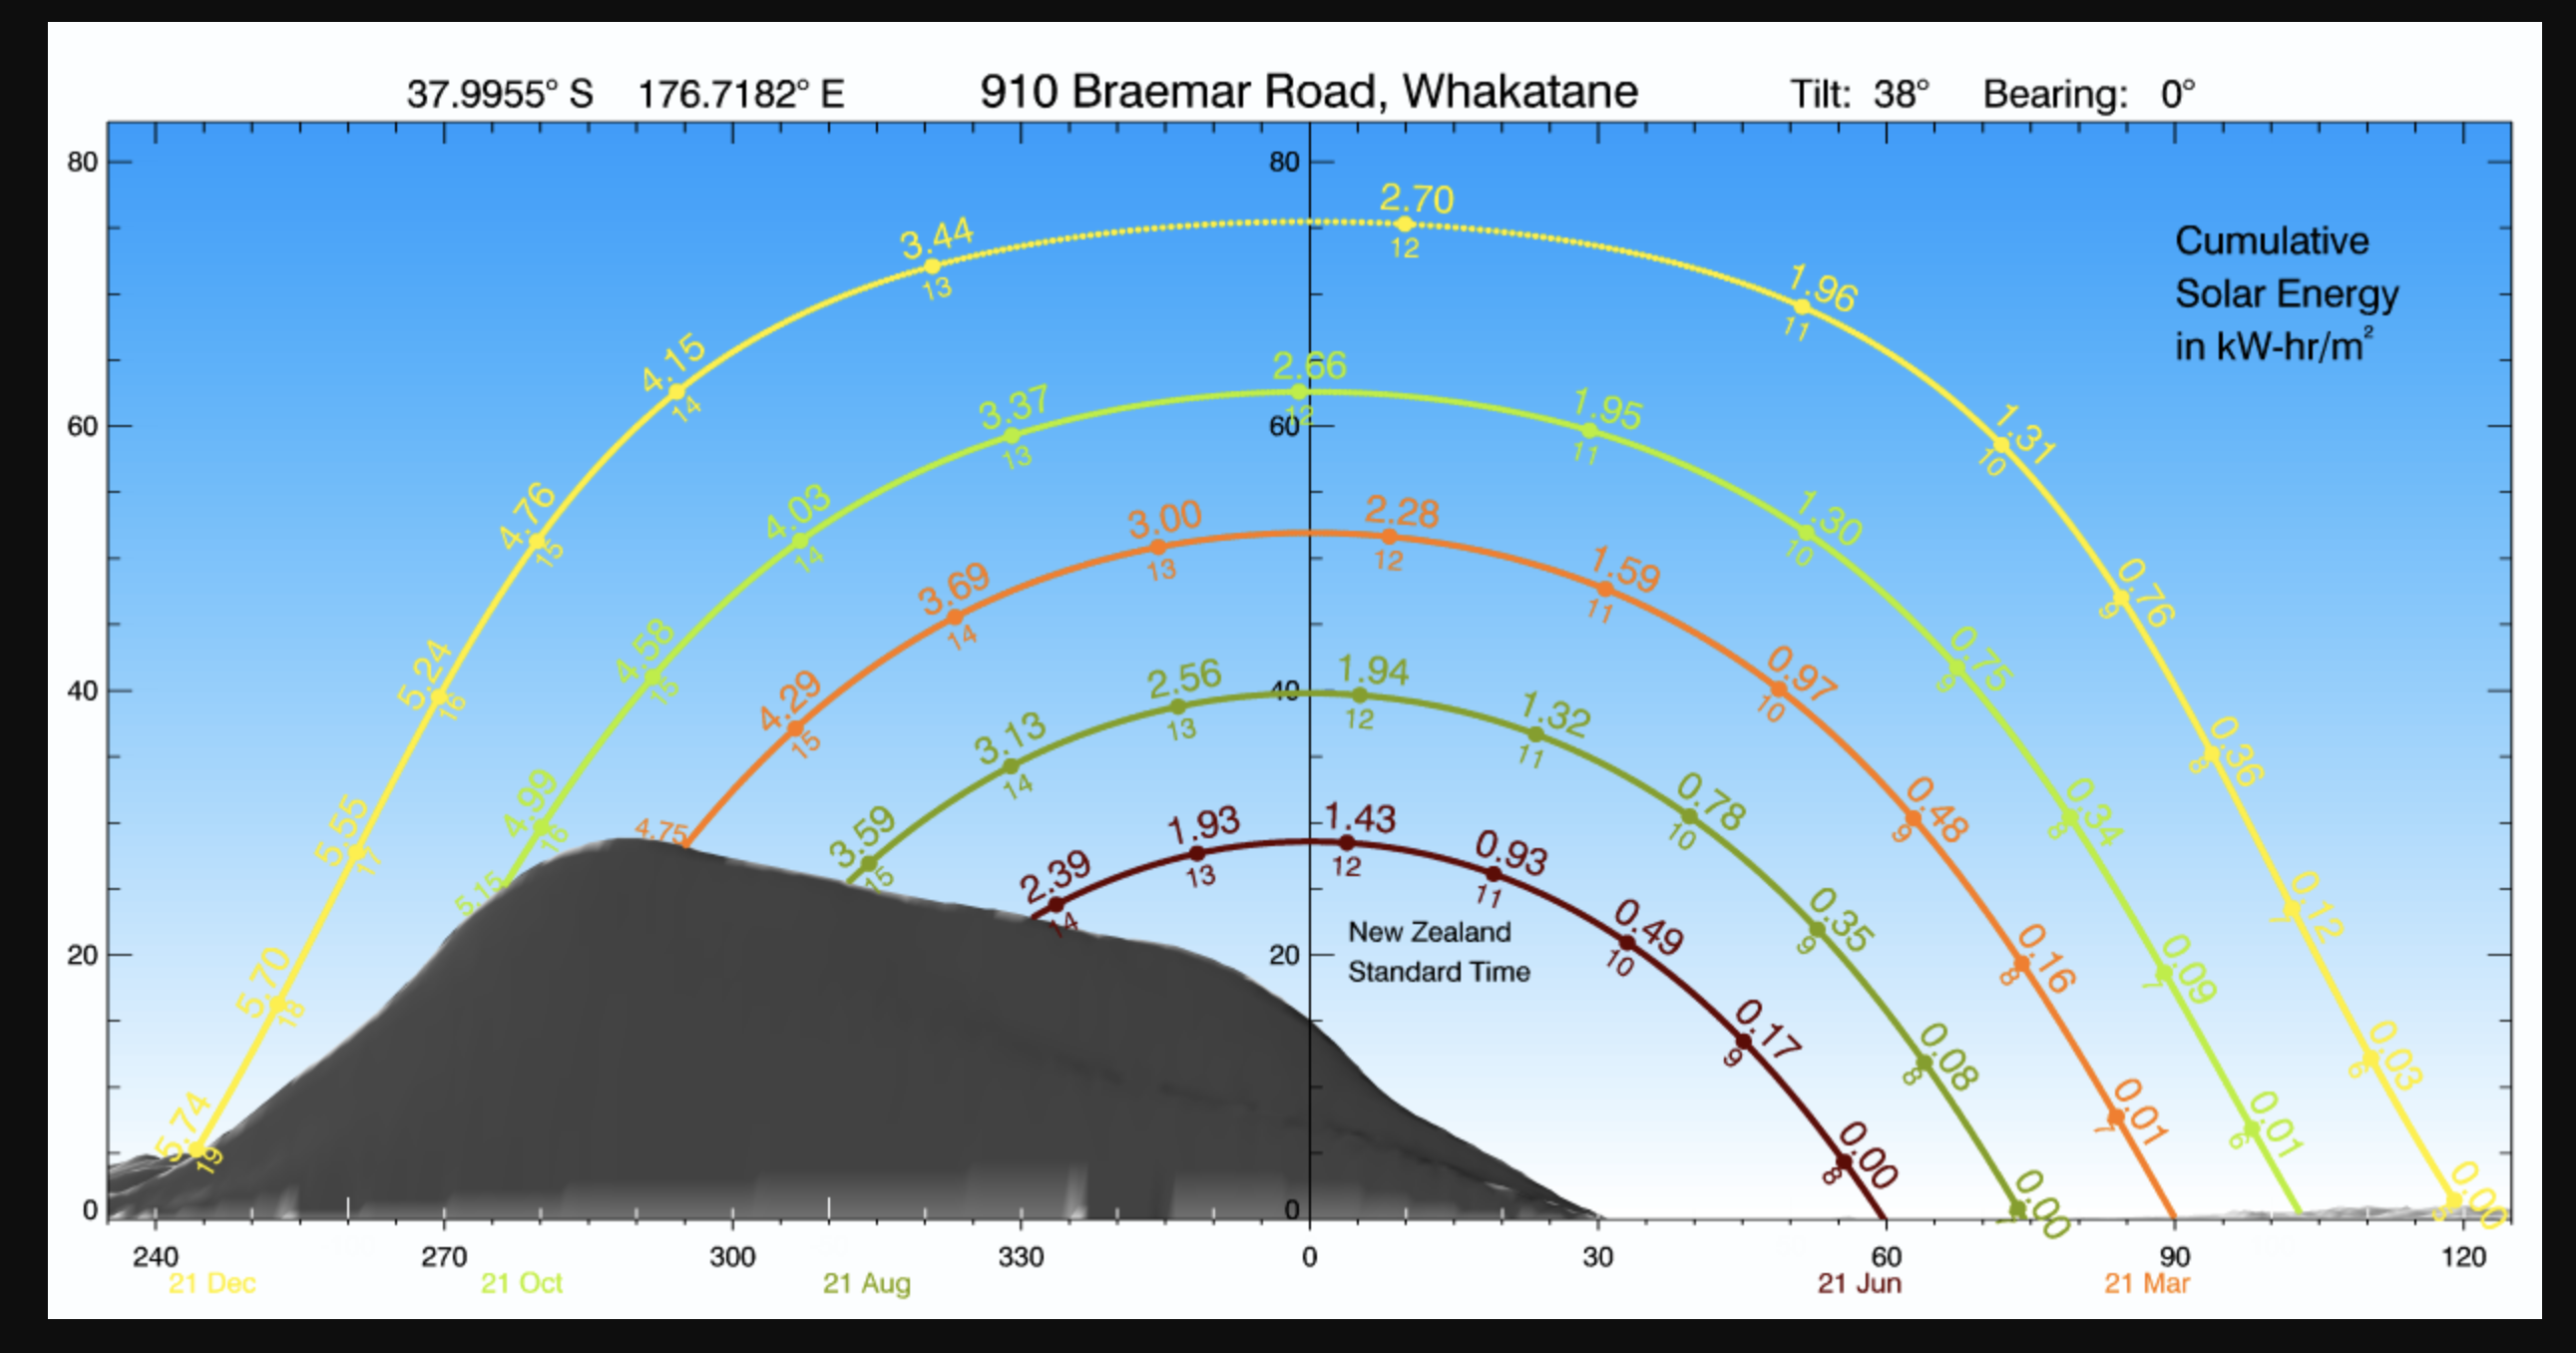

In [6]:
from IPython.display import Image

fig = Image(filename=('./Braemar_sun_hours.png'))
fig
#IFrame("./Braemar_sun_hours.png", width=300, height=300)

In [7]:
sun_hours = pd.read_csv('sunhours.csv', usecols=[0,1,2,3,4,5])
sun_hours.head(n=10)
new = sun_hours["Month & hour"].str.split(" ", n = 1, expand = True)
sun_hours.insert(0,'Month', new[0])
sun_hours.insert(1,'Hour', new[1])
sun_hours['W/m2 hourly'] = sun_hours['Hourly W/m2']
sun_hours['W/m2 no clouds'] = sun_hours['Cloudless W/m2']
sun_hours.drop(columns = ["Month & hour", 'Hourly W/m2','Cloudless W/m2'],inplace=True)
sun_hours.head(n=25)

,Month,Hour,Elevation,Azimuth,Cumulative kWh/m2,W/m2 hourly,W/m2 no clouds
0,Jan,0:00,-31.9,178.1,0.00,0,0
1,Jan,1:00,-29.9,161.9,0.00,0,0
2,Jan,2:00,-24.8,147.1,0.00,0,0
3,Jan,3:00,-17.3,134.3,0.00,0,0
4,Jan,4:00,-8.1,123.4,0.00,0,0
5,Jan,5:00,2.3,113.9,0.01,9,16
6,Jan,6:00,13.5,105.2,0.07,63,57
7,Jan,7:00,25.1,96.7,0.28,204,275
8,Jan,8:00,36.9,87.7,0.65,371,517
9,Jan,9:00,48.6,77.0,1.19,539,741


In [8]:
sun_hours.iloc[23::24,4]

23     5.94
47     5.42
71     4.67
95     3.73
119    2.94
143    2.56
167    2.66
191    3.69
215    4.30
239    5.22
263    5.70
287    5.75
Name: Cumulative kWh/m2, dtype: float64

['10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00']

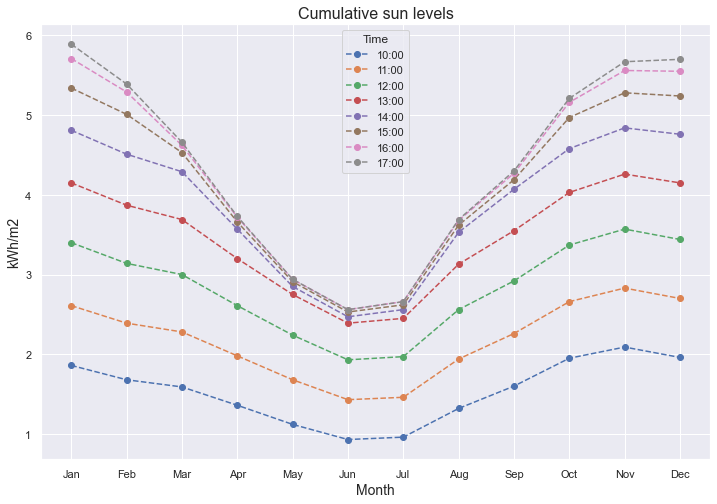

In [9]:
plt.figure(figsize=(12,8))
obj = list(sun_hours.iloc[10:19,1])
for i in range(10,18):
    plt.plot(sun_hours['Month'][i::24], sun_hours.iloc[i::24,4], label=obj[i-10],linestyle='--', marker='o')
plt.title('Cumulative sun levels',size=16)
plt.xlabel('Month',size=14)
plt.ylabel('kWh/m2',size=14)
plt.legend(title='Time')
obj

In [10]:
df_month = sun_hours.iloc[:,[0,4,5,6]].groupby(['Month'], sort=False).max()
df_month

,Cumulative kWh/m2,W/m2 hourly,W/m2 no clouds
Month,,,
Jan,5.94,789,1064
Feb,5.42,752,1091
Mar,4.67,720,1072
Apr,3.73,630,992
May,2.94,567,897
Jun,2.56,500,852
Jul,2.66,514,894
Aug,3.69,617,988
Sep,4.30,660,1063


In [11]:
df_hour = sun_hours.iloc[:,[1,4,5,6]].groupby(['Hour']).mean()
df_hour

,Cumulative kWh/m2,W/m2 hourly,W/m2 no clouds
Hour,,,
0:00,0.000000,0.000000,0.000000
1:00,0.000000,0.000000,0.000000
2:00,0.000000,0.000000,0.000000
3:00,0.000000,0.000000,0.000000
4:00,0.000000,0.000000,0.000000
5:00,0.006667,5.750000,7.083333
6:00,0.040833,36.416667,45.750000
7:00,0.181667,139.500000,217.250000
8:00,0.491667,310.916667,487.583333


Text(0, 0.5, 'Mean hourly irradiance (W/m2)')

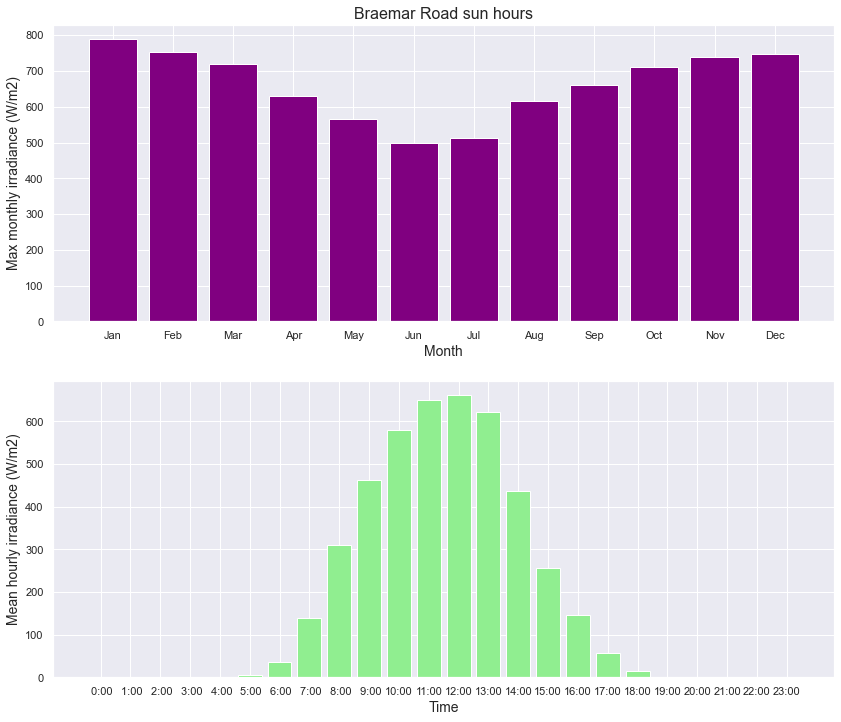

In [12]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(14, 12))
ax0.bar(df_month.index,df_month['W/m2 hourly'], color='purple')
ax1.bar(df_hour.index,df_hour['W/m2 hourly'],color='lightgreen')
ax0.set_title('Braemar Road sun hours', size=16)
ax0.set_xlabel('Month', size=14)
ax1.set_xlabel('Time', size=14)
ax0.set_ylabel('Max monthly irradiance (W/m2)', size=14)
ax1.set_ylabel('Mean hourly irradiance (W/m2)', size=14)

## Solar installation costs

In [13]:
@interact(battery_cost = (0,20000),
    house_install = (6000,15000),
    percent_use = (.4,1.0))
def payback(battery_cost = 18000,
    house_install = 12000,
    percent_use = .8):
    install_cost = battery_cost + house_install
    payback_years = (install_cost/((no_spa*12)*percent_use)).round(1)
    print('Time to payback is {0} years.'.format(payback_years))
    return payback_years
#payback_years = payback()   

interactive(children=(IntSlider(value=18000, description='battery_cost', max=20000), IntSlider(value=12000, de…

In [16]:
import numpy_financial as npf
@interact(interestRate = (1.0,10.0),
            principal = (8000,30000),
            time = (4.0,15.0),
            percent_use = (.3,.99))
def returns(interestRate = .065,
            principal = 25000,
            time = 10,
            percent_use = .8):
    interestRate = interestRate/100.0
    taxation_rate = .30
    pmt = npf.pmt(interestRate/12, 12* time, principal).round(2)
    print('The monthly opportunity cost, minus tax, of putting ${0} into a house to be paid back in {1} years is ${2:.2f}.'.format(principal,time, pmt*(1-taxation_rate)))
    print('The power saving is approximately ${0:.2f} per month.'.format(no_spa*percent_use))
    return pmt, interestRate, time, principal, percent_use
#pmt, interestRate, time, principal, percent_use = returns()

interactive(children=(FloatSlider(value=1.0, description='interestRate', max=10.0, min=1.0), IntSlider(value=2…

In [17]:
no_spa

267.46994219653175